In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

import csv

In [2]:
uc = pd.read_csv('https://raw.githubusercontent.com/yujingDING/qm_assignment/main/hw2_5.csv')

In [3]:
#uc = uc.drop(['crime'], axis=1)
uc.info()
uc
#uc.head()
#uc.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   borough             224 non-null    object 
 1   year                224 non-null    int64  
 2   theft               224 non-null    float64
 3   robbery             224 non-null    float64
 4   burglary            224 non-null    float64
 5   property crime      224 non-null    float64
 6   unemployment        224 non-null    float64
 7   earnings            224 non-null    float64
 8   education           224 non-null    float64
 9   population density  224 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 17.6+ KB


,borough,year,theft,robbery,burglary,property crime,unemployment,earnings,education,population density
0,Westminster,2015,103.4500,6.3800,13.0500,122.8800,6.4100,656.0000,62.6000,11.2800
1,Wandsworth,2015,20.5800,1.4500,7.6000,29.6300,5.0700,670.1000,66.1000,9.2000
2,Waltham Forest,2015,17.4000,2.4000,8.2300,28.0300,6.4300,476.3000,42.6000,7.0000
3,Tower Hamlets,2015,24.7800,3.8400,8.7100,37.3300,7.7000,554.9000,45.8000,14.9600
4,Sutton,2015,11.2600,0.8300,6.3500,18.4500,5.1200,498.3000,42.4000,4.5700
5,Southwark,2015,29.0200,3.9700,9.6500,42.6400,6.9400,557.0000,56.7000,10.7200
6,Richmond upon Thames,2015,14.6600,0.7800,7.3800,22.8200,4.3900,648.0000,69.7000,3.3900
7,Redbridge,2015,13.8700,2.2200,7.5600,23.6500,6.1900,533.1000,44.7000,5.2600
8,Newham,2015,23.1700,4.2200,6.8200,34.2100,7.7800,421.6000,43.1000,9.2300
9,Merton,2015,15.2800,1.2900,7.0100,23.5800,4.8400,548.1000,57.9000,5.4600


In [4]:
uc.describe()

,year,theft,robbery,burglary,property crime,unemployment,earnings,education,population density
count,224.0000,224.0000,224.0000,224.0000,224.0000,224.0000,224.0000,224.0000,224.0000
mean,"2,018.0000",23.9998,3.1579,7.8460,35.0041,5.5684,578.2960,53.9835,7.7423
std,2.0045,19.6349,2.1199,2.2371,23.2164,1.1499,76.7734,10.4518,3.9898
min,"2,015.0000",8.8400,0.5300,2.9500,12.6300,2.6500,421.6000,26.1000,2.1700
25%,"2,016.0000",14.9150,1.7075,6.4850,23.4475,4.7575,524.2250,46.7500,4.6600
50%,"2,018.0000",17.2800,2.6600,7.5950,27.7600,5.4300,566.2500,54.0000,6.1850
75%,"2,020.0000",27.1375,4.0900,8.8650,40.7700,6.2625,628.4250,62.0000,11.1100
max,"2,021.0000",180.0500,17.2800,17.9800,215.3100,9.7700,802.0000,75.7000,16.7600


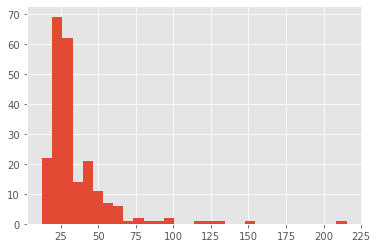

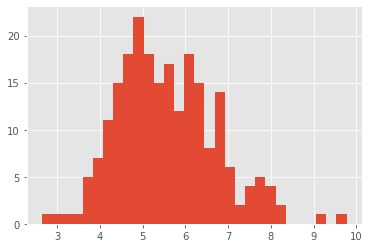

In [5]:
uc['property crime'].hist(bins=30)

plt.show()

uc['unemployment'].hist(bins=30)

plt.show()

Text(0.5, 1.0, 'before')

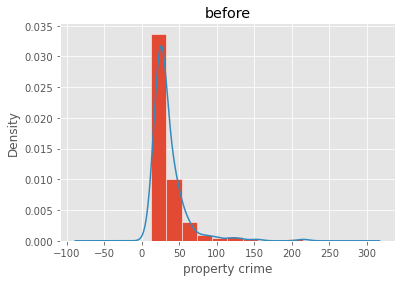

In [6]:
data = uc['property crime']  # 将数据由数组转换成series形式
plt.hist(data,density = True,edgecolor ='w')
data.plot(kind = 'kde')
# plt.legend()
plt.xlabel("property crime")
plt.title("before")

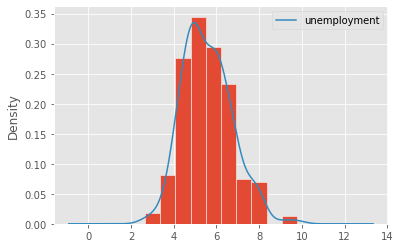

In [7]:
data2 = uc['unemployment']  # 将数据由数组转换成series形式
plt.hist(data2,density = True,edgecolor ='w')
data2.plot(kind = 'kde')
plt.legend()

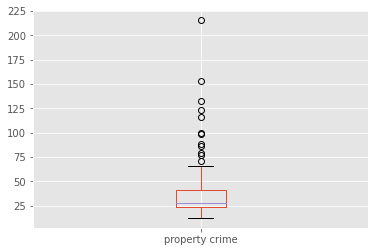

In [8]:
uc.boxplot(column='property crime')
plt.show()

uq = np.percentile(uc['property crime'], 75)
lq = np.percentile(uc['property crime'], 25)
iqr = uq - lq
outlier1 = uq + 1.5 * iqr
outlier2 = lq - 1.5 * iqr
#print(outlier1)
#print(outlier2)

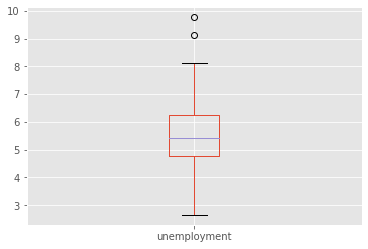

8.519999999999998
2.5000000000000018


In [9]:
uc.boxplot(column='unemployment')
plt.show()

uq2 = np.percentile(uc['unemployment'], 75)
lq2 = np.percentile(uc['unemployment'], 25)
iqr2 = uq2 - lq2
outlier3 = uq2 + 1.5 * iqr2
outlier4 = lq2 - 1.5 * iqr2
print(outlier3)
print(outlier4)

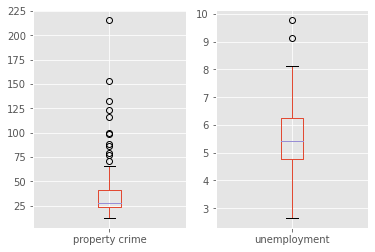

In [10]:
fig = plt.figure()

# 第一个箱线图
plt.subplot(1,2,1)
uc.boxplot(column = 'property crime')

# 第二个箱线图
plt.subplot(1,2,2)
uc.boxplot(column = 'unemployment')

plt.show()

In [11]:
uc = uc[uc['property crime'] < outlier1]
uc = uc[uc['unemployment'] < outlier3]
uc = uc[outlier4 < uc['unemployment']]

uc.head()
uc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 1 to 222
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   borough             210 non-null    object 
 1   year                210 non-null    int64  
 2   theft               210 non-null    float64
 3   robbery             210 non-null    float64
 4   burglary            210 non-null    float64
 5   property crime      210 non-null    float64
 6   unemployment        210 non-null    float64
 7   earnings            210 non-null    float64
 8   education           210 non-null    float64
 9   population density  210 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 18.0+ KB


In [12]:
'''
#缩尾

from scipy.stats.mstats import winsorize

df_list = ['property crime','theft','robbery','burglary','crime'] #需要进行缩尾的列名

for i in df_list:
    uc[i] = winsorize(uc[i],limits=[0, 0.01]) #对指定列中的连续数据进行1%和99%的缩尾（Winsorize）处理
    
uc['property crime'].hist(bins=30)

plt.show()
'''

"\n#缩尾\n\nfrom scipy.stats.mstats import winsorize\n\ndf_list = ['property crime','theft','robbery','burglary','crime'] #需要进行缩尾的列名\n\nfor i in df_list:\n    uc[i] = winsorize(uc[i],limits=[0, 0.01]) #对指定列中的连续数据进行1%和99%的缩尾（Winsorize）处理\n    \nuc['property crime'].hist(bins=30)\n\nplt.show()\n"

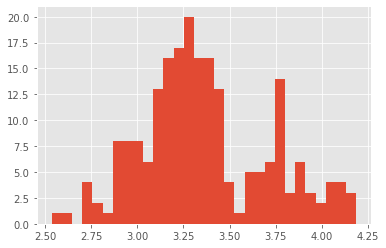

3.3642379030186795

In [13]:
#log

uc['property crime']=np.log(uc['property crime'])
uc['property crime'].hist(bins=30)

plt.show()
uc['property crime'].mean()

Text(0.5, 1.0, 'after')

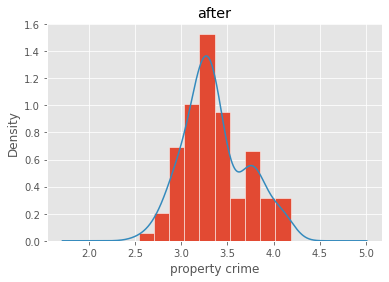

In [14]:
data3 = uc['property crime']  # 将数据由数组转换成series形式
plt.hist(data3,density = True,edgecolor ='w')
data3.plot(kind = 'kde')
# plt.legend()
plt.xlabel("property crime")
plt.title("after")

In [15]:
uc_noborough = uc.iloc[:,1:]

uc_noborough.head()

,year,theft,robbery,burglary,property crime,unemployment,earnings,education,population density
1,2015,20.5800,1.4500,7.6000,3.3888,5.0700,670.1000,66.1000,9.2000
2,2015,17.4000,2.4000,8.2300,3.3333,6.4300,476.3000,42.6000,7.0000
3,2015,24.7800,3.8400,8.7100,3.6198,7.7000,554.9000,45.8000,14.9600
4,2015,11.2600,0.8300,6.3500,2.9151,5.1200,498.3000,42.4000,4.5700
5,2015,29.0200,3.9700,9.6500,3.7528,6.9400,557.0000,56.7000,10.7200


In [16]:
'''
#标准化

from sklearn import preprocessing
import matplotlib.pyplot as plt

#Z-score标准化

#uc_noyear = uc_noborough.drop(['year'], axis=1)

#zscore_scaler = preprocessing.StandardScaler()
#uc_zscore = zscore_scaler.fit_transform(uc_noborough)


t = uc_noborough.iloc[:,:]
uc_zscore = (t-t.mean())/(t.std())

'''

"\n#标准化\n\nfrom sklearn import preprocessing\nimport matplotlib.pyplot as plt\n\n#Z-score标准化\n\n#uc_noyear = uc_noborough.drop(['year'], axis=1)\n\n#zscore_scaler = preprocessing.StandardScaler()\n#uc_zscore = zscore_scaler.fit_transform(uc_noborough)\n\n\nt = uc_noborough.iloc[:,:]\nuc_zscore = (t-t.mean())/(t.std())\n\n"

In [17]:
# print(uc_zscore)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = uc[['unemployment', 'earnings', 'population density']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

print(vif_data)


              feature                                      VIF
0        unemployment                                  17.5729
1            earnings                                  17.3053
2  population density                                   5.7114


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df


In [20]:
# using VIF on the dataset
df_predictors_selected_VIF = drop_column_using_vif_(uc_noborough.drop(['theft', 'robbery', 'burglary', 'property crime'], axis=1))

# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)


The columns remaining after VIF selection are:
Index(['year', 'unemployment', 'earnings', 'education', 'population density'], dtype='object')


In [21]:
uc_zscore = uc_noborough

uc_nopercent = uc_zscore.drop(['theft','robbery', 'burglary', 'property crime','education'], axis=1)

In [22]:
uc_ppty = uc_zscore.drop(['theft','robbery', 'burglary'], axis=1)

In [23]:
# OLS

model_uc_ppty = sm.OLS(endog=uc_ppty[['property crime']], exog=sm.add_constant(uc_nopercent)).fit()
model_uc_ppty.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         property crime   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     123.9
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           1.43e-53
Time:                        13:20:34   Log-Likelihood:                 57.443
No. Observations:                 210   AIC:                            -104.9
Df Residuals:                     205   BIC:                            -88.15
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 88.5826     14.541      6.092      0.000      59.913     117.252
year                  -0.0425      0.007     -5.868      0.000      -0.057      -0.028
unemployment          -0.0259      0.014     -1.862      0.064      -0.053       0.002
earnings               0.0003      0.000      1.094      0.275      -0.000       0.001
population density     0.0709      0.004     17.152      0.000       0.063       0.079
==============================================================================
Omnibus:                        2.325   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                2.374
Skew:                          -0.248   Prob(JB):                        0.305
Kurtosis:                       2.844   Cond. No.                     2.37e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
'''
result = model_uc_ppty.summary()
result_text = result.as_text()
resultFile = open("ppty_ols.csv",'w')
resultFile.write(result_text)
resultFile.close()
'''

'\nresult = model_uc_ppty.summary()\nresult_text = result.as_text()\nresultFile = open("ppty_ols.csv",\'w\')\nresultFile.write(result_text)\nresultFile.close()\n'

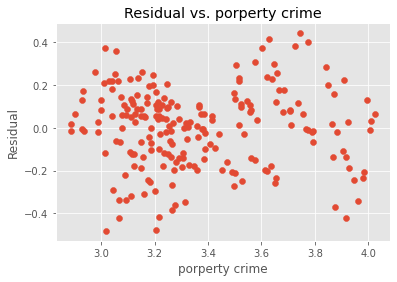

In [25]:
# plot 
plt.scatter(model_uc_ppty.fittedvalues, model_uc_ppty.resid)
# adding title and labels
plt.xlabel('porperty crime')
plt.ylabel('Residual')
plt.title('Residual vs. porperty crime')
plt.show()


In [26]:
'''
price = pd.read_csv('price.csv',index_col = 0)
pb = pd.read_csv('pb.csv',index_col = 0)
roe = pd.read_csv('roe.csv',index_col = 0)
mkt = pd.read_csv('mkt.csv',index_col = 0)
ST = pd.read_excel('ST.xlsx')
ind = pd.read_csv('中信一级行业.csv',encoding = 'gbk')
# 收益率计算
price['tradedate'] = price.tradedate.apply(getdate)
pb['tradedate'] = pb.tradedate.apply(getdate)
roe['tradedate'] = roe.tradedate.apply(getdate)
mkt['tradedate'] = mkt.tradedate.apply(getdate)
ind['tradedate'] = ind.tradedate.apply(getdate)
ret_m = getRet(price,freq ='m',if_shift = True)
mom1 = getRet(price,freq ='m',if_shift = False)
mom1 = mom1.rename(columns = {'ret':'mom1'})
fall = pd.merge(pb,roe,left_on = ['tradedate','stockcode'],right_on = ['tradedate','stockcode'])
fall = pd.merge(fall,mkt,left_on = ['tradedate','stockcode'],right_on = ['tradedate','stockcode'])
fall['tradedate'] = fall.tradedate.apply(getdate)
fall = pd.merge(fall,mom1,left_on = ['tradedate','stockcode'],right_on = ['tradedate','stockcode'])del fall['rptdate']ind,on = ['tradedate','stockcode'])
alldata = pd.merge(fall,ret_m,left_on = ['tradedate','stockcode'],right_on = ['tradedate','stockcode'])
alldata['mktcap'] = np.log(alldata.mktcap)

# classname转虚拟变量
alldata = pd.get_dummies(alldata,columns = ['classname'],drop_first = True,prefix = '',prefix_sep = '')
indname = list(alldata.columns[-28:])
from statsmodels.iolib.summary2 import summary_col

'''

"\nprice = pd.read_csv('price.csv',index_col = 0)\npb = pd.read_csv('pb.csv',index_col = 0)\nroe = pd.read_csv('roe.csv',index_col = 0)\nmkt = pd.read_csv('mkt.csv',index_col = 0)\nST = pd.read_excel('ST.xlsx')\nind = pd.read_csv('中信一级行业.csv',encoding = 'gbk')\n# 收益率计算\nprice['tradedate'] = price.tradedate.apply(getdate)\npb['tradedate'] = pb.tradedate.apply(getdate)\nroe['tradedate'] = roe.tradedate.apply(getdate)\nmkt['tradedate'] = mkt.tradedate.apply(getdate)\nind['tradedate'] = ind.tradedate.apply(getdate)\nret_m = getRet(price,freq ='m',if_shift = True)\nmom1 = getRet(price,freq ='m',if_shift = False)\nmom1 = mom1.rename(columns = {'ret':'mom1'})\nfall = pd.merge(pb,roe,left_on = ['tradedate','stockcode'],right_on = ['tradedate','stockcode'])\nfall = pd.merge(fall,mkt,left_on = ['tradedate','stockcode'],right_on = ['tradedate','stockcode'])\nfall['tradedate'] = fall.tradedate.apply(getdate)\nfall = pd.merge(fall,mom1,left_on = ['tradedate','stockcode'],right_on = ['tradedate','st

In [27]:
#### OLS ####
'''
fmdata = alldata.set_index(['stockcode','tradedate'])
fmdata = fmdata.fillna(0)
ols_data = fmdata.xs(datetime.date(2010,1,29),level = 1)

from statsmodels.iolib.summary2 import *
y = ols_data['ret']
x1 = ols_data[['pb'] + indname]
x2 = ols_data[['mktcap'] + indname]
x3 = ols_data[['mom1'] + indname]
x4 = ols_data[['roe_ttm'] + indname]
x5 = ols_data[['pb','mktcap','mom1','roe_ttm'] + indname]
res_ols1 = sm.OLS(y,sm.add_constant(x1)).fit()
res_ols2 = sm.OLS(y,sm.add_constant(x2)).fit()
res_ols3 = sm.OLS(y,sm.add_constant(x3)).fit()
res_ols4 = sm.OLS(y,sm.add_constant(x4)).fit()
res_ols5 = sm.OLS(y,sm.add_constant(x5)).fit()
res_ols1.summary()summary_col([res_ols1,res_ols2,res_ols3,res_ols4,res_ols5],             
                              model_names = ['f1','f2','f3','f4','f5'],             
                              stars = True,regressor_order = ['const','pb','mktcap','mom1','roe_ttm'],             
                              drop_omitted = indname,info_dict = {'':lambda x: '','':lambda x: '','Observation':lambda x:str(int(x.nobs)),
                                                                 })
'''

"\nfmdata = alldata.set_index(['stockcode','tradedate'])\nfmdata = fmdata.fillna(0)\nols_data = fmdata.xs(datetime.date(2010,1,29),level = 1)\n\nfrom statsmodels.iolib.summary2 import *\ny = ols_data['ret']\nx1 = ols_data[['pb'] + indname]\nx2 = ols_data[['mktcap'] + indname]\nx3 = ols_data[['mom1'] + indname]\nx4 = ols_data[['roe_ttm'] + indname]\nx5 = ols_data[['pb','mktcap','mom1','roe_ttm'] + indname]\nres_ols1 = sm.OLS(y,sm.add_constant(x1)).fit()\nres_ols2 = sm.OLS(y,sm.add_constant(x2)).fit()\nres_ols3 = sm.OLS(y,sm.add_constant(x3)).fit()\nres_ols4 = sm.OLS(y,sm.add_constant(x4)).fit()\nres_ols5 = sm.OLS(y,sm.add_constant(x5)).fit()\nres_ols1.summary()summary_col([res_ols1,res_ols2,res_ols3,res_ols4,res_ols5],             \n                              model_names = ['f1','f2','f3','f4','f5'],             \n                              stars = True,regressor_order = ['const','pb','mktcap','mom1','roe_ttm'],             \n                              drop_omitted = indname,in

In [28]:
from statsmodels.iolib.summary2 import *

In [29]:
uc_ppty = uc_zscore.drop(['theft','robbery', 'burglary'], axis=1)
uc_theft = uc_zscore.drop(['robbery', 'burglary', 'property crime'], axis=1)
uc_robbery = uc_zscore.drop(['theft', 'burglary', 'property crime'], axis=1)
uc_burglary = uc_zscore.drop(['theft','robbery', 'property crime'], axis=1)
#uc_total_crime = uc_zscore.drop(['theft','robbery', 'burglary','property crime'], axis=1)

In [30]:
# OLS

ols_uc_ppty = sm.OLS(endog=uc_ppty[['property crime']], exog=sm.add_constant(uc_nopercent)).fit()
ols_uc_theft = sm.OLS(endog=uc_theft[['theft']], exog=sm.add_constant(uc_nopercent)).fit()
ols_uc_robbery = sm.OLS(endog=uc_robbery[['robbery']], exog=sm.add_constant(uc_nopercent)).fit()
ols_uc_burglary = sm.OLS(endog=uc_burglary[['burglary']], exog=sm.add_constant(uc_nopercent)).fit()
#ols_uc_totalcrime = sm.OLS(endog=uc_total_crime[['crime']], exog=sm.add_constant(uc_nopercent)).fit()

In [31]:
ols_uc_ppty.summary()
summary_col([ols_uc_theft,ols_uc_robbery,ols_uc_burglary,ols_uc_ppty],
            model_names = ['theft','robbery','burglary','porperty crime'],
            stars = True,regressor_order = ['unemployment','earnings','education',
                                            'population density','const','year'],
            info_dict = {'':lambda x: '','':lambda x: '','Observation':lambda x:str(int(x.nobs)),
                        })

,theft,robbery,burglary,porperty crime
unemployment,-0.2370,-0.2534***,-0.3858***,-0.0259*
,(0.3693),(0.0725),(0.0972),(0.0139)
earnings,0.0244***,-0.0093***,0.0003,0.0003
,(0.0062),(0.0012),(0.0016),(0.0002)
population density,1.6658***,0.3544***,0.2939***,0.0709***
,(0.1097),(0.0215),(0.0288),(0.0041)
const,2382.8419***,-311.7367***,676.3282***,88.5826***
,(385.6410),(75.6955),(101.4430),(14.5411)
year,-1.1832***,0.1579***,-0.3315***,-0.0425***
,(0.1921),(0.0377),(0.0505),(0.0072)


In [32]:
'''
# stargazer包
pip install stargazer
'''

'\n# stargazer包\npip install stargazer\n'

In [33]:
'''
import pandas as pd
from sklearn import datasets
import statsmodels.api as sm
from stargazer.stargazer import Stargazer, LineLocation
'''

'\nimport pandas as pd\nfrom sklearn import datasets\nimport statsmodels.api as sm\nfrom stargazer.stargazer import Stargazer, LineLocation\n'

In [34]:
'''
stargazer = Stargazer([ols_uc_theft,ols_uc_robbery,ols_uc_burglary,ols_uc_ppty,ols_uc_totalcrime])
stargazer.title('Regression Results of Unemployment to Property Crime')
# stargazer.show_model_numbers(False)
stargazer.covariate_order(['unemployment','earnings','education',
                           'population density','const','year'])

stargazer.show_degrees_of_freedom(False)
# stargazer.custom_columns(['theft','robbery','burglary','porperty crime','total crime'],[1,1])
'''

"\nstargazer = Stargazer([ols_uc_theft,ols_uc_robbery,ols_uc_burglary,ols_uc_ppty,ols_uc_totalcrime])\nstargazer.title('Regression Results of Unemployment to Property Crime')\n# stargazer.show_model_numbers(False)\nstargazer.covariate_order(['unemployment','earnings','education',\n                           'population density','const','year'])\n\nstargazer.show_degrees_of_freedom(False)\n# stargazer.custom_columns(['theft','robbery','burglary','porperty crime','total crime'],[1,1])\n"

In [35]:
'''
stargazer
'''

'\nstargazer\n'

In [36]:
'''
# 导出
result = stargazer
result_text = result.render_html()
resultFile = open("reg_table.html",'w')
resultFile.write(result_text)
resultFile.close()
'''

'\n# 导出\nresult = stargazer\nresult_text = result.render_html()\nresultFile = open("reg_table.html",\'w\')\nresultFile.write(result_text)\nresultFile.close()\n'

In [37]:
# cluster

# The following lines import the necessary packages
import pandas as pd

import matplotlib.cm
from matplotlib import colors
import matplotlib.pyplot as plt # For plotting
import numpy as np              # For working with numerical data
import sklearn.cluster as sklc  # For clustering
import sklearn.metrics as sklm  # For the silhouette score

from sklearn.preprocessing import RobustScaler
import sklearn


In [38]:
# This line sets the number of clusters you want to find:
num_clusters = 2

In [39]:
data_final = uc_ppty.drop(['earnings','education','population density','year'], axis=1)

data_final.rename(columns={'property crime':'property_crime'},inplace = True)

data_final.head()

,property_crime,unemployment
1,3.3888,5.0700
2,3.3333,6.4300
3,3.6198,7.7000
4,2.9151,5.1200
5,3.7528,6.9400


In [40]:
# we fix the random_state so that the kmeans result is reproducible
random_state_seed = 100
kmeans_output = sklc.KMeans(n_clusters = num_clusters, random_state = random_state_seed).fit(data_final)

# Sanity check
print(kmeans_output) 

KMeans(n_clusters=2, random_state=100)


In [41]:
# This line creates a list giving the final cluster number of each point:
clustering_ids_kmeans = kmeans_output.labels_

# You can print the clustering IDs to get an ordered list of labels
print(clustering_ids_kmeans)

[0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0
 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0]


In [42]:
# we will combine the clustering IDs to the dataframe

data_cluster = uc.assign(cluster_id = clustering_ids_kmeans)

# Have a look at the result:
# print(data_cluster)
data_cluster.head()

,borough,year,theft,robbery,burglary,property crime,unemployment,earnings,education,population density,cluster_id
1,Wandsworth,2015,20.5800,1.4500,7.6000,3.3888,5.0700,670.1000,66.1000,9.2000,0
2,Waltham Forest,2015,17.4000,2.4000,8.2300,3.3333,6.4300,476.3000,42.6000,7.0000,1
3,Tower Hamlets,2015,24.7800,3.8400,8.7100,3.6198,7.7000,554.9000,45.8000,14.9600,1
4,Sutton,2015,11.2600,0.8300,6.3500,2.9151,5.1200,498.3000,42.4000,4.5700,0
5,Southwark,2015,29.0200,3.9700,9.6500,3.7528,6.9400,557.0000,56.7000,10.7200,1


In [43]:
data_cluster.rename(columns={'property crime':'property_crime'},inplace = True)

data_cluster.head()

,borough,year,theft,robbery,burglary,property_crime,unemployment,earnings,education,population density,cluster_id
1,Wandsworth,2015,20.5800,1.4500,7.6000,3.3888,5.0700,670.1000,66.1000,9.2000,0
2,Waltham Forest,2015,17.4000,2.4000,8.2300,3.3333,6.4300,476.3000,42.6000,7.0000,1
3,Tower Hamlets,2015,24.7800,3.8400,8.7100,3.6198,7.7000,554.9000,45.8000,14.9600,1
4,Sutton,2015,11.2600,0.8300,6.3500,2.9151,5.1200,498.3000,42.4000,4.5700,0
5,Southwark,2015,29.0200,3.9700,9.6500,3.7528,6.9400,557.0000,56.7000,10.7200,1


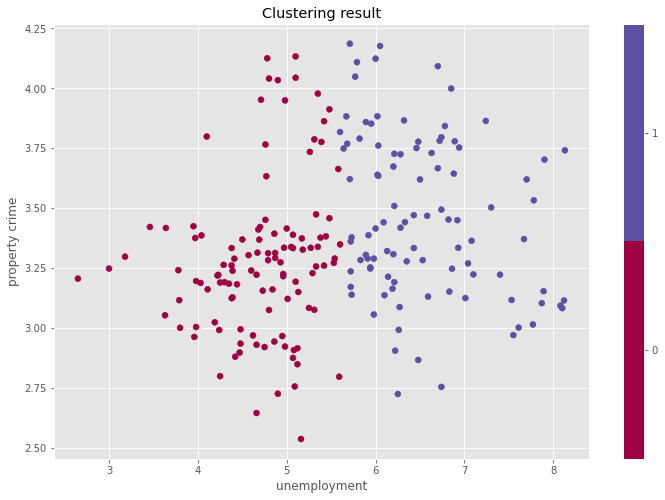

In [44]:
fig, ax = plt.subplots(figsize=(12,8))

# number of clusters
n_clusters = data_cluster.cluster_id.nunique()

# get discrete colormap
cmap = plt.get_cmap('Spectral', n_clusters)

# scatter points
scatter = ax.scatter(data_cluster.unemployment, data_cluster.property_crime, c = data_cluster.cluster_id, cmap = cmap)
ax.set_xlabel('unemployment')
ax.set_ylabel('property crime')
ax.set_title('Clustering result')

# add colorbar
cbar = plt.colorbar(scatter)

# set ticks locations (not very elegant, but it works):
# - shift by 0.5
# - scale so that the last value is at the center of the last color
tick_locs = (np.arange(n_clusters) + 0.5)*(n_clusters-1)/n_clusters
cbar.set_ticks(tick_locs)

# set tick labels (as before)
cbar.set_ticklabels(np.arange(n_clusters))

In [45]:
# These lines calculate the silhouette score...
silhouette_kmeans = sklm.silhouette_score(data_final,clustering_ids_kmeans)

# ... and print it:
print("Silhouette Score:", silhouette_kmeans)

Silhouette Score: 0.5168351056447976


In [46]:
X = data_final[['property_crime', 'unemployment']]
random_state_seed = 10
df_silhouette_score = pd.DataFrame({'n_cluster':[2,3,4,5,6,7], 'silhouette_score':[0,0,0,0,0,0]})
for index, row in df_silhouette_score.iterrows():
    n_clusters = row['n_cluster']
    clusterer = sklc.KMeans(n_clusters=n_clusters, random_state=random_state_seed).fit(X)
    cluster_labels = clusterer.labels_
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = sklm.silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    row['silhouette_score'] = silhouette_avg

For n_clusters = 2 The average silhouette_score is : 0.5168351056447976
For n_clusters = 3 The average silhouette_score is : 0.4425320832944945
For n_clusters = 4 The average silhouette_score is : 0.39978762606610296
For n_clusters = 5 The average silhouette_score is : 0.3805368073853772
For n_clusters = 6 The average silhouette_score is : 0.4046399491359848
For n_clusters = 7 The average silhouette_score is : 0.38308194291692244
